# Preprocessing (version unifiée - one hot encoding lieux de comptage)

In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [96]:
# Import des datasets
df_2023 = pd.read_csv('../data/raw/2023-comptage-velo-donnees-compteurs.csv', sep=';')
df_2024 = pd.read_csv('../data/raw/2024-comptage-velo-donnees-compteurs.csv', sep=';')

In [97]:
# Concaténation des années 2023 et 2024
df = pd.concat([df_2023, df_2024], axis=0)

In [98]:
cond = (df['Nom du compteur'] == 'Face au 48 quai de la marne NE-SO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100047542-103047542'
df.loc[cond, 'Identifiant du site de comptage'] = 100047542
df.loc[cond, 'Nom du site de comptage'] = 'Face au 48 quai de la marne'
df.loc[cond, "Date d'installation du site de comptage"] = '2018-11-29'
df.loc[cond, 'Coordonnées géographiques'] = '48.89128,2.38606'

In [99]:
cond = (df['Nom du compteur'] == 'Face au 48 quai de la marne SO-NE') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100047542-104047542'
df.loc[cond, 'Identifiant du site de comptage'] = 100047542
df.loc[cond, 'Nom du site de comptage'] = 'Face au 48 quai de la marne'
df.loc[cond, "Date d'installation du site de comptage"] = '2018-11-29'
df.loc[cond, 'Coordonnées géographiques'] = '48.89128,2.38606'

In [100]:
cond = (df['Nom du compteur'] == 'Quai des Tuileries NO-SE') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056035-353266462'
df.loc[cond, 'Identifiant du site de comptage'] = 100056035
df.loc[cond, 'Nom du site de comptage'] = 'Quai des Tuileries'
df.loc[cond, "Date d'installation du site de comptage"] = '2021-05-18'
df.loc[cond, 'Coordonnées géographiques'] = '48.8635,2.32239'

In [101]:
cond = (df['Nom du compteur'] == 'Quai des Tuileries SE-NO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056035-353266460'
df.loc[cond, 'Identifiant du site de comptage'] = 100056035
df.loc[cond, 'Nom du site de comptage'] = 'Quai des Tuileries'
df.loc[cond, "Date d'installation du site de comptage"] = '2021-05-18'
df.loc[cond, 'Coordonnées géographiques'] = '48.8635,2.32239'

In [102]:
cond = (df['Nom du compteur'] == 'Pont des Invalides N-S') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056223-101056223'
df.loc[cond, 'Identifiant du site de comptage'] = 100056223
df.loc[cond, 'Nom du site de comptage'] = 'Pont des Invalides'
df.loc[cond, "Date d'installation du site de comptage"] = '2019-11-07'
df.loc[cond, 'Coordonnées géographiques'] = '48.86281,2.31037'

In [103]:
cond = (df['Nom du compteur'] == '10 avenue de la Grande Armée SE-NO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100044494-353504987'
df.loc[cond, 'Identifiant du site de comptage'] = 100044494
df.loc[cond, 'Nom du site de comptage'] = '10 avenue de la Grande Armée'
df.loc[cond, "Date d'installation du site de comptage"] = '2018-07-27'
df.loc[cond, 'Coordonnées géographiques'] = '48.8748,2.2924'

In [104]:
cond = (df['Nom du compteur'] == '27 quai de la Tournelle NO-SE') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056336-104056336'
df.loc[cond, 'Identifiant du site de comptage'] = 100056336
df.loc[cond, 'Nom du site de comptage'] = '27 quai de la Tournelle'
df.loc[cond, "Date d'installation du site de comptage"] = '2019-11-14'
df.loc[cond, 'Coordonnées géographiques'] = '48.85013,2.35423'

In [105]:
cond = (df['Nom du compteur'] == '27 quai de la Tournelle SE-NO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056336-103056336'
df.loc[cond, 'Identifiant du site de comptage'] = 100056336
df.loc[cond, 'Nom du site de comptage'] = '27 quai de la Tournelle'
df.loc[cond, "Date d'installation du site de comptage"] = '2019-11-14'
df.loc[cond, 'Coordonnées géographiques'] = '48.85013,2.35423'

In [106]:
# Suppression des variables inutiles pour la modélisation
drop_columns = columns = [
    "Identifiant technique compteur",
    "ID Photos",
    "test_lien_vers_photos_du_site_de_comptage_",
    "id_photo_1",
    "url_sites",
    "type_dimage",
    "mois_annee_comptage",
    "Lien vers photo du site de comptage",
    "Date d'installation du site de comptage", 
    "Identifiant du compteur", 
    "Identifiant du site de comptage",
    "Coordonnées géographiques"
]
df_clean = df.drop(columns = drop_columns)
df_clean.head()

,Nom du compteur,Nom du site de comptage,Comptage horaire,Date et heure de comptage
0,97 avenue Denfert Rochereau SO-NE,97 avenue Denfert Rochereau,4,2023-01-01T07:00:00+01:00
1,97 avenue Denfert Rochereau SO-NE,97 avenue Denfert Rochereau,14,2023-01-01T04:00:00+01:00
2,97 avenue Denfert Rochereau SO-NE,97 avenue Denfert Rochereau,10,2023-01-01T09:00:00+01:00
3,97 avenue Denfert Rochereau SO-NE,97 avenue Denfert Rochereau,25,2023-01-01T16:00:00+01:00
4,97 avenue Denfert Rochereau SO-NE,97 avenue Denfert Rochereau,14,2023-01-01T05:00:00+01:00


In [107]:
# Fusion des compteurs doublons identifiés pendant l'exploration
df_clean = df_clean.replace({
    'Face au 48 quai de la marne Face au 48 quai de la marne Vélos NE-SO': 'Face au 48 quai de la marne NE-SO',
    'Face au 48 quai de la marne Face au 48 quai de la marne Vélos SO-NE': 'Face au 48 quai de la marne SO-NE',
    'Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli Vélos E-O': 'Totem 64 Rue de Rivoli E-O',
    'Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli Vélos O-E': 'Totem 64 Rue de Rivoli O-E',
    'Quai des Tuileries Quai des Tuileries Vélos NO-SE': 'Quai des Tuileries NO-SE',
    'Quai des Tuileries Quai des Tuileries Vélos SE-NO': 'Quai des Tuileries SE-NO',
    'Pont des Invalides (couloir bus)': 'Pont des Invalides',
    '69 Boulevard Ornano (temporaire)': '69 Boulevard Ornano',
    '30 rue Saint Jacques (temporaire)': '30 rue Saint Jacques',
    '27 quai de la Tournelle 27 quai de la Tournelle Vélos NO-SE': '27 quai de la Tournelle NO-SE',
    '27 quai de la Tournelle 27 quai de la Tournelle Vélos SE-NO': '27 quai de la Tournelle SE-NO',
    'Pont des Invalides (couloir bus) N-S': 'Pont des Invalides N-S',
})

In [108]:
# Drop des 2 observations des compteurs dont la direction n'est pas claire
df_clean = df_clean.drop(index=df.loc[df['Nom du compteur'] == '10 avenue de la Grande Armée 10 avenue de la Grande Armée [Bike OUT]'].index)
df_clean = df_clean.drop(index=df.loc[df['Nom du compteur'] == '10 avenue de la Grande Armée 10 avenue de la Grande Armée [Bike IN]'].index)

In [109]:
df_clean = df_clean.drop(columns=["Nom du compteur"])

In [110]:
df_clean.duplicated(subset=["Nom du site de comptage", "Date et heure de comptage"]).sum()

593565

In [111]:
df_clean = df_clean.drop_duplicates(subset=["Nom du site de comptage", "Comptage horaire", "Date et heure de comptage"], keep="first")

In [112]:
# On vérifie s'il y a des valeurs duplicated
df_clean.duplicated().sum()
# Il n'y en a pas.

0

In [113]:
df_clean.isna().sum()

Nom du site de comptage      0
Comptage horaire             0
Date et heure de comptage    0
dtype: int64

In [114]:
# Convertir la colonne en datetime (avec gestion du fuseau horaire)
df_clean["Date et heure de comptage"] = pd.to_datetime(df_clean["Date et heure de comptage"], utc=True)
df_clean["Date et heure de comptage"] = df_clean["Date et heure de comptage"].dt.tz_convert("Europe/Paris")

# Mets les dates dans l'ordre croissant
df_clean = df_clean.sort_values(by="Date et heure de comptage")

In [115]:
# Pour suprimer les lignes se référant à l'année 2022 :
df_clean = df_clean.drop(df_clean[df_clean["Date et heure de comptage"].dt.year == 2022].index)

In [116]:
#Crée 4 colonnes Année, Jour, Mois et Heure 
#Ensuite on range dans l'ordre Heure Jour Mois et Année
df_clean["Jour"] = df_clean["Date et heure de comptage"].dt.day
df_clean["Année"] = df_clean["Date et heure de comptage"].dt.year
df_clean["Mois"] = df_clean["Date et heure de comptage"].dt.month
df_clean["Heure"] = df_clean["Date et heure de comptage"].dt.hour
df_clean["Jour_semaine"] = df_clean["Date et heure de comptage"].dt.weekday + 1
df_clean["Week-end"] = (df_clean["Jour_semaine"] >= 5).astype(int)
df_clean.insert(3, "Jour", df_clean.pop("Jour"))
df_clean.insert(4, "Mois", df_clean.pop("Mois"))
df_clean.insert(5, "Année", df_clean.pop("Année"))
df_clean.insert(6, "Heure", df_clean.pop("Heure"))

In [117]:
# Création manuelle des jours fériés en France pour 2023, 2024 et 2025
jours_feries_france = [
    "2023-01-01", "2023-04-10", "2023-05-01", "2023-05-08", "2023-05-18", "2023-05-29",
    "2023-07-14", "2023-08-15", "2023-11-01", "2023-11-11", "2023-12-25",
    "2024-01-01", "2024-04-01", "2024-05-01", "2024-05-08", "2024-05-09", "2024-05-20",
    "2024-07-14", "2024-08-15", "2024-11-01", "2024-11-11", "2024-12-25",
    "2025-01-01"
]

jours_feries_france = pd.to_datetime(jours_feries_france)

# Ajout de la colonne "Jour férié" (1 si jour férié, 0 sinon)
df_clean["Jour férié"] = df_clean["Date et heure de comptage"].dt.date.isin(jours_feries_france.date).astype(int)


In [118]:
# Définition des périodes de vacances scolaires (Zone C)
vacances = [
    ("2022-12-17", "2023-01-03"),
    ("2023-02-18", "2023-03-06"),
    ("2023-04-22", "2023-05-09"),
    ("2023-07-08", "2023-09-04"),
    ("2023-10-21", "2023-11-06"),
    ("2023-12-24", "2024-01-08"),
    ("2024-02-10", "2024-02-26"),
    ("2024-04-06", "2024-04-22"),
    ("2024-05-08", "2024-05-13"),
    ("2024-07-06", "2024-09-02"),
    ("2024-10-19", "2024-11-04"),
    ("2024-12-21", "2025-01-06"),
]

# Création d'un ensemble de dates correspondant aux vacances
dates_vacances = pd.DatetimeIndex([])  # Initialisation

for debut, fin in vacances:
    dates_vacances = dates_vacances.union(pd.date_range(start=debut, end=fin))

# Appliquer le fuseau horaire pour correspondre à df_clean
dates_vacances = dates_vacances.tz_localize("Europe/Paris")  # On ajoute le TZ

# Vérification d'appartenance
df_clean["Vacances scolaires"] = df_clean["Date et heure de comptage"].dt.normalize().isin(dates_vacances).astype(int)

In [119]:
df_clean = df_clean.groupby(by=['Nom du site de comptage', 'Date et heure de comptage', 'Jour', 'Mois','Année', 'Heure', 'Jour_semaine', 'Week-end', 'Jour férié','Vacances scolaires'], as_index=False)['Comptage horaire'].sum()

In [120]:
# OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int) 

array = encoder.fit_transform(df_clean[["Nom du site de comptage"]])

encoded_df_clean = pd.DataFrame(array, columns=encoder.get_feature_names_out(["Nom du site de comptage"]))

encoded_df_clean.index = df_clean.index

df_clean = pd.concat([df_clean.drop(columns=["Nom du site de comptage"]), encoded_df_clean], axis=1)

In [121]:
df_clean = df_clean.drop(columns=["Date et heure de comptage"])

In [122]:
df_clean.head()

,Jour,Mois,Année,Heure,Jour_semaine,Week-end,Jour férié,Vacances scolaires,Comptage horaire,Nom du site de comptage_10 avenue de la Grande Armée,...,Nom du site de comptage_Pont de la Concorde,Nom du site de comptage_Pont des Invalides,Nom du site de comptage_Pont du Garigliano,Nom du site de comptage_Quai d'Orsay,Nom du site de comptage_Quai des Tuileries,Nom du site de comptage_Totem 64 Rue de Rivoli,Nom du site de comptage_Totem 73 boulevard de Sébastopol,Nom du site de comptage_Totem 85 quai d'Austerlitz,Nom du site de comptage_Totem Cours la Reine,Nom du site de comptage_Voie Georges Pompidou
0,1,1,2023,4,7,1,1,1,11,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2023,5,7,1,1,1,8,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2023,6,7,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2023,7,7,1,1,1,4,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2023,8,7,1,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df_clean.isna().sum()

Jour                                                        0
Mois                                                        0
Année                                                       0
Heure                                                       0
Jour_semaine                                                0
                                                           ..
Nom du site de comptage_Totem 64 Rue de Rivoli              0
Nom du site de comptage_Totem 73 boulevard de Sébastopol    0
Nom du site de comptage_Totem 85 quai d'Austerlitz          0
Nom du site de comptage_Totem Cours la Reine                0
Nom du site de comptage_Voie Georges Pompidou               0
Length: 77, dtype: int64

In [138]:
print(df_clean["Comptage horaire"].mean())
print(df_clean["Comptage horaire"].median())
print(df_clean["Comptage horaire"].max())

113.00436254093515
60.0
3166


In [127]:
# Détection des valeurs aberrantes avec la méthode des quartiles (IQR)

Q1 = df_clean["Comptage horaire"].quantile(0.25)
Q3 = df_clean["Comptage horaire"].quantile(0.75)
IQR = Q3 - Q1

# Seuils pour détecter les valeurs aberrantes
seuil1 = Q1 - 1.5 * IQR
seuil2 = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes
outliers = df_clean[(df_clean["Comptage horaire"] < seuil1) | (df_clean["Comptage horaire"] > seuil2)]

# Nombre de valeurs aberrantes détectées
nb_outliers = outliers.shape[0]

print(nb_outliers)
print('''
Ce nombre est très élevé car la médiane du comptage horaire tend vers 0. (médiane ~ 40, moyenne ~ 75)
Par conséquent, il faudra éliminer les outliers les plus remarquables.''')

95320

Ce nombre est très élevé car la médiane du comptage horaire tend vers 0. (médiane ~ 40, moyenne ~ 75)
Par conséquent, il faudra éliminer les outliers les plus remarquables.


In [ ]:
for val in sorted(df_clean["Comptage horaire"].unique()):
    print(val)

In [129]:
#On met Comptage horaire dans l'ordre décroissant pour permettre
#de supprimer les valeurs les plus hautes de Comptage horaire.

df_clean = df_clean.sort_values(by="Comptage horaire", ascending=False).iloc[5:]

In [130]:
df_clean["Comptage horaire"].max()

3166

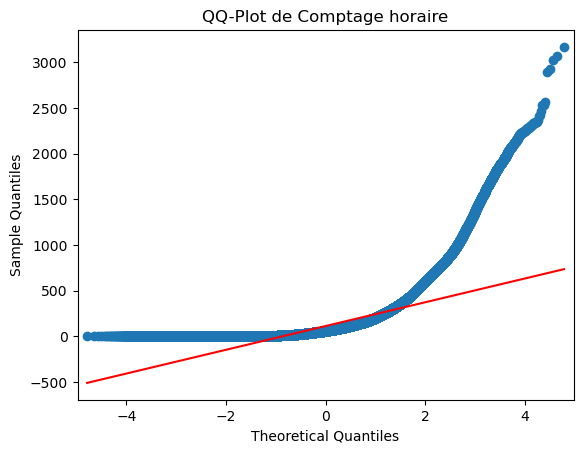


On peut se rendre compte que la distribution n'est pas normale.
Ceci peut s'expliquer par le fait que les données sont concentrées vers 0.


In [131]:
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(df_clean["Comptage horaire"], line = "r")
plt.title("QQ-Plot de Comptage horaire")
plt.show()

print('''
On peut se rendre compte que la distribution n'est pas normale.
Ceci peut s'expliquer par le fait que les données sont concentrées vers 0.''')

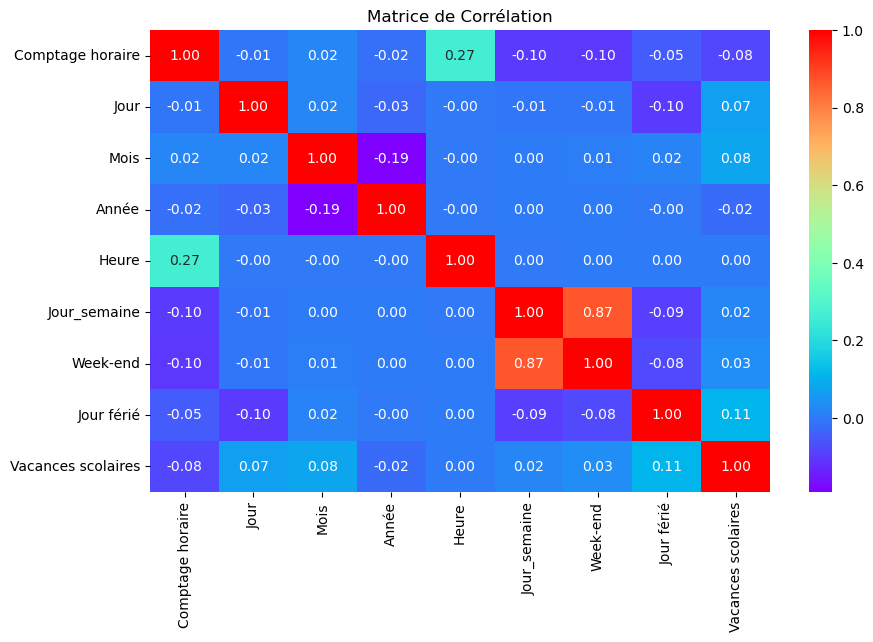

In [132]:
# Suite au OneHotEncoder, la variable Nom du site de comptage ne peut plus être prise en compte

columns = ["Comptage horaire", "Jour", "Mois", "Année", "Heure", "Jour_semaine","Week-end", "Jour férié", "Vacances scolaires"]
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[columns].corr(), annot=True, cmap="rainbow", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

In [133]:
# Suite à observation que la colonne week-end est très corrélée avec la colonne jour_semaine, on drop la colonne week-end
df_clean = df_clean.drop(columns = ["Week-end"])

In [134]:
df_clean.head()

,Jour,Mois,Année,Heure,Jour_semaine,Jour férié,Vacances scolaires,Comptage horaire,Nom du site de comptage_10 avenue de la Grande Armée,Nom du site de comptage_10 boulevard Auguste Blanqui,...,Nom du site de comptage_Pont de la Concorde,Nom du site de comptage_Pont des Invalides,Nom du site de comptage_Pont du Garigliano,Nom du site de comptage_Quai d'Orsay,Nom du site de comptage_Quai des Tuileries,Nom du site de comptage_Totem 64 Rue de Rivoli,Nom du site de comptage_Totem 73 boulevard de Sébastopol,Nom du site de comptage_Totem 85 quai d'Austerlitz,Nom du site de comptage_Totem Cours la Reine,Nom du site de comptage_Voie Georges Pompidou
57773,14,6,2023,14,3,0,0,3166,0,0,...,0,0,0,0,0,0,0,0,0,0
1092998,5,1,2025,15,7,0,1,3070,0,0,...,0,0,0,1,0,0,0,0,0,0
1171485,20,6,2023,23,2,0,0,3024,0,0,...,0,0,0,0,0,0,0,0,1,0
57487,2,6,2023,16,5,0,0,2925,0,0,...,0,0,0,0,0,0,0,0,0,0
57812,16,6,2023,5,5,0,0,2887,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df_clean.to_csv('../data/processed/lieu-compteur-one-hot-encoded.csv')

In [ ]:
# TODO séparer dataset d'entrainement et dataset de test
y = df_clean["Comptage horaire"]
X = df_clean.drop(columns=["Comptage horaire"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardisation

col_norm = ["Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]

scaler = StandardScaler()  # Standardisation (moyenne = 0, écart-type = 1)
df_clean[col_norm] = scaler.fit_transform(df_clean[col_norm])

In [ ]:
# Normalisation
col_norm = ["Nom du compteur", "Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]

scaler = MinMaxScaler(feature_range=(0, 1))  # Normalisation entre 0 et 1
df_clean[col_norm] = scaler.fit_transform(df_clean[col_norm])

In [27]:
# TODO enregistrer les datasets entrainement/test nettoyés dans des fichiers CSV sur GitHub avec .to_csv()
